<a href="https://colab.research.google.com/github/ozalakshay/repo/blob/main/sc_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x = float(input("Enter value of X: "))
b = float(input("Enter value of bias: "))
w = float(input("Enter value of weight: "))

net = (w * x + b)

print("****** Output *********")
print(f"net = {net}")

if net < 0:
    out = 0
elif 0 <= net <= 1:
    out = net
else:
    out = 1

print(f"Output = {out}")


Enter value of X: 0.2
Enter value of bias: 0.45
Enter value of weight: 0.3
****** Output *********
net = 0.51
Output = 0.51


In [ ]:
w1*x1+w2*x2 + b

In [ ]:
import math

x = []
w = []

n = int(input("Enter the number of inputs: "))

for i in range(n):
    x.append(float(input(f"Enter value of X{i+1}: ")))
    w.append(float(input(f"Enter value of weight w{i+1}: ")))

b = float(input("Enter value of bias: "))

sumxw = sum(w[i] * x[i] for i in range(n))
net = sumxw + b

print("****** Output *********")
print(f"net = {net}")

if net < 0:
    out = 0
elif 0 <= net <= 1:
    out = net
else:
    out = 1

print(f"Output = {out}")

# Sigmoid Activation Functions
binary_sigmoid = 1 / (1 + math.exp(-net))
bipolar_sigmoid = 2 / (1 + math.exp(-net)) - 1

print("\n------------x-------------")
print(f"\nBinary sigmoidal activation function: {binary_sigmoid}")
print(f"\nBipolar sigmoidal activation function: {bipolar_sigmoid}")


Enter the number of inputs: 3
Enter value of X1: 0.3
Enter value of weight w1: 0.1
Enter value of X2: 0.6
Enter value of weight w2: 0.3
Enter value of X3: 0.4
Enter value of weight w3: 0.2
Enter value of bias: 0.35
****** Output *********
net = 0.64
Output = 0.64

------------x-------------

Binary sigmoidal activation function: 0.6547534606063192

Bipolar sigmoidal activation function: 0.30950692121263845


In [ ]:
import numpy as np

num_ip = int(input("Enter the number of inputs: "))

w1, w2 = 1, 1  # Weights
x1, x2 = [], []

print(f"Enter values for {num_ip} inputs:")
for j in range(num_ip):
    ele1 = int(input(f"x1[{j+1}] = "))
    ele2 = int(input(f"x2[{j+1}] = "))
    x1.append(ele1)
    x2.append(ele2)

# Convert lists to NumPy arrays
x1, x2 = np.array(x1), np.array(x2)

# Compute net inputs using weights
Yin = (x1 * w1) + (x2 * w2)
print("\nNet Inputs (Yin) = ", Yin)

# Assuming one weight as excitatory & the other as inhibitory
Yin_modified = (x1 * w1) - (x2 * w2)
print("\nAfter assuming one weight as excitatory & other inhibitory:")
print("Modified Yin =", Yin_modified)

# Apply activation function (Threshold: 1)
Y = np.where(Yin_modified >= 1, 1, 0)

print("\nFinal Output (Y) =", Y.tolist())


Enter the number of inputs: 3
Enter values for 3 inputs:
x1[1] = 0
x2[1] = 1
x1[2] = 0
x2[2] = 1
x1[3] = 0
x2[3] = 1

Net Inputs (Yin) =  [1 1 1]

After assuming one weight as excitatory & other inhibitory:
Modified Yin = [-1 -1 -1]

Final Output (Y) = [0, 0, 0]


In [ ]:
import numpy as np

num_ip = int(input("Enter the number of inputs: "))

w1, w2 = 1, 1  # Weights

x1, x2 = [], []
for j in range(num_ip):
    ele1 = int(input(f"Input {j+1} - x1: "))
    ele2 = int(input(f"Input {j+1} - x2: "))
    x1.append(ele1)
    x2.append(ele2)

x1 = np.array(x1)
x2 = np.array(x2)

# Calculate net input Yin
Yin = x1 * w1 + x2 * w2
print("Yin =", Yin.tolist())

# After assuming one weight as excitatory & the other as inhibitory
Yin_mod = x1 * w1 - x2 * w2
print("Modified Yin =", Yin_mod.tolist())

# Apply activation function (Threshold = 1)
Y = [1 if yin >= 1 else 0 for yin in Yin_mod]
print("Y =", Y)


Enter the number of inputs: 4
Input 1 - x1: 0
Input 1 - x2: 0
Input 2 - x1: 0
Input 2 - x2: 1
Input 3 - x1: 1
Input 3 - x2: 0
Input 4 - x1: 1
Input 4 - x2: 1
Yin = [0, 1, 1, 2]
Modified Yin = [0, -1, 1, 0]
Y = [0, 0, 1, 0]


In [ ]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training data for XOR
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
expected_outputs = np.array([[0], [1], [1], [0]])

# Initialize weights and biases
np.random.seed(1)
weights_input_hidden = np.random.uniform(-1, 1, (2, 2))  # 2 input -> 2 hidden
weights_hidden_output = np.random.uniform(-1, 1, (2, 1)) # 2 hidden -> 1 output
bias_hidden = np.random.uniform(-1, 1, (1, 2))
bias_output = np.random.uniform(-1, 1, (1, 1))

# Training parameters
learning_rate = 0.5
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Compute error
    output_error = expected_outputs - final_output
    output_gradient = output_error * sigmoid_derivative(final_output)

    # Backpropagation
    hidden_error = output_gradient.dot(weights_hidden_output.T)
    hidden_gradient = hidden_error * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(output_gradient) * learning_rate
    weights_input_hidden += inputs.T.dot(hidden_gradient) * learning_rate
    bias_output += np.sum(output_gradient, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * learning_rate

# Testing the trained network
hidden_input = np.dot(inputs, weights_input_hidden) + bias_hidden
hidden_output = sigmoid(hidden_input)
final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
final_output = sigmoid(final_input)

# Display results
print("Final XOR predictions:")
print(np.round(final_output))


Final XOR predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


In [ ]:
# Single Neuron Perceptron in Python

# Get user inputs
w = float(input("Enter the weight: "))
d = float(input("Enter the learning coefficient: "))

x = 1  # Input value (constant)
at = 0.3  # Threshold (adjustment factor)

print("\nConsider a single neuron perceptron with a single input")

# Training loop (10 iterations)
for i in range(4):
    net = x + w  # Calculate net input
    a = 1 if w >= 0 else 0  # Activation function (step function)

    div = at + a + w  # Weight change calculation
    w = w + div  # Update weight

    # Print results
    print(f"\nIteration {i + 1}:")
    print(f"Activation (a): {a}")
    print(f"Change in weight (div): {div}")
    print(f"Updated weight (w): {w}")
    print(f"Net value: {net}")


Enter the weight: 1
Enter the learning coefficient: 2

Consider a single neuron perceptron with a single input

Iteration 1:
Activation (a): 1
Change in weight (div): 2.3
Updated weight (w): 3.3
Net value: 2.0

Iteration 2:
Activation (a): 1
Change in weight (div): 4.6
Updated weight (w): 7.8999999999999995
Net value: 4.3

Iteration 3:
Activation (a): 1
Change in weight (div): 9.2
Updated weight (w): 17.099999999999998
Net value: 8.899999999999999

Iteration 4:
Activation (a): 1
Change in weight (div): 18.4
Updated weight (w): 35.5
Net value: 18.099999999999998


In [ ]:
import math

# Compute net input (weighted sum)
def compute_net(inputs, weights):
    net = sum(i * w for i, w in zip(inputs, weights))
    print(f"NET: {net}")
    return net

# Binary activation function
def binary_activation(net):
    return 1 if net > 0 else -1

# Continuous activation function
def continuous_activation(net):
    return (2 / (1 + math.exp(-net))) - 1

# Learning rules
def hebb_rule(f_net):
    return f_net

def perceptron_rule(desired, actual):
    return desired - actual

def widrow_rule(desired, actual):
    return desired - actual

# Adjust weights based on learning rule
def adjust_weights(inputs, weights, binary, desired, rule):
    c = 1  # Learning rate
    print("\nApplying Rule:", rule)

    for i, input_vector in enumerate(inputs):
        net = compute_net(input_vector, weights)
        f_net = binary_activation(net) if binary else continuous_activation(net)

        if rule == "hebb":
            r = hebb_rule(f_net)
        elif rule == "perceptron":
            r = perceptron_rule(desired[i], f_net)
        elif rule == "widrow":
            r = widrow_rule(desired[i], net)
        else:
            raise ValueError("Invalid rule")

        # Update weights
        for j in range(len(weights)):
            weights[j] += c * r * input_vector[j]

        print(f"Updated Weights: {weights}")

# Main execution
if __name__ == "__main__":
    weights = [1, -1, 0, 0.5]
    inputs = [[1, -2, 1.5, 0], [1, -0.5, -2, -1.5], [0, 1, -1, 1.5]]
    desired = [1, 2, 1]

    # Apply different learning rules
    adjust_weights(inputs, weights.copy(), True, None, "hebb")       # Binary Hebb
    adjust_weights(inputs, weights.copy(), False, None, "hebb")      # Continuous Hebb
    adjust_weights(inputs, weights.copy(), True, desired, "perceptron")  # Perceptron
    adjust_weights(inputs, weights.copy(), True, desired, "widrow")      # Widrow Hoff



Applying Rule: hebb
NET: 3.0
Updated Weights: [2, -3, 1.5, 0.5]
NET: -0.25
Updated Weights: [1, -2.5, 3.5, 2.0]
NET: -3.0
Updated Weights: [1, -3.5, 4.5, 0.5]

Applying Rule: hebb
NET: 3.0
Updated Weights: [1.9051482536448667, -2.8102965072897335, 1.3577223804673002, 0.5]
NET: -0.15514825364486695
Updated Weights: [1.8277293602795268, -2.7715870606070636, 1.51256016719798, 0.6161283400480099]
NET: -3.3599547177330287
Updated Weights: [1.8277293602795268, -3.704445675857497, 2.4454187824484137, -0.7831595828276404]

Applying Rule: perceptron
NET: 3.0
Updated Weights: [1, -1, 0.0, 0.5]
NET: 0.75
Updated Weights: [2, -1.5, -2.0, -1.0]
NET: -1.0
Updated Weights: [2, 0.5, -4.0, 2.0]

Applying Rule: widrow
NET: 3.0
Updated Weights: [-1.0, 3.0, -3.0, 0.5]
NET: 2.75
Updated Weights: [-1.75, 3.375, -1.5, 1.625]
NET: 7.3125
Updated Weights: [-1.75, -2.9375, 4.8125, -7.84375]


In [ ]:
def main():
    # Initialize weight vector
    input_values = []
    for i in range(3):
        val = float(input(f"Initialize weight vector {i}: "))
        input_values.append(val)

    # Get the desired output
    desired_output = float(input("\nEnter the desired output: "))

    # Initialize weights and other variables
    weights = [0.0, 0.0, 0.0]  # Initial weights
    a = 0  # Current activation/output
    delta = desired_output - a  # Error term

    # Training loop
    while delta != 0:
        if delta < 0:
            for i in range(3):
                weights[i] -= input_values[i]
        elif delta > 0:
            for i in range(3):
                weights[i] += input_values[i]

        # Update weights based on error
        for i in range(3):
            val = delta * input_values[i]
            weights[i] += val

        print(f"\nValue of delta: {delta}")
        print("Weights have been adjusted:", weights)

        # Recalculate delta
        a = sum(input_values)  # Example: Summing input values as a dummy activation function
        delta = desired_output - a

    print("\nOutput is correct!")

if __name__ == "__main__":
    main()


Initialize weight vector 0: 1
Initialize weight vector 1: 2
Initialize weight vector 2: 1

Enter the desired output: 0

Output is correct!


In [ ]:
import math
import random
import sys

# Neural Network Configuration
INPUT_NEURONS = 4
HIDDEN_NEURONS = 6
OUTPUT_NEURONS = 14
LEARN_RATE = 0.2
NOISE_FACTOR = 0.58
TRAINING_REPS = 10000
MAX_SAMPLES = 14

# Training Data
TRAINING_INPUTS = [
    [1, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 0], [1, 0, 1, 0],
    [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 1, 1, 1],
    [1, 1, 0, 1], [0, 1, 1, 1], [1, 0, 1, 1], [1, 0, 0, 1],
    [0, 1, 0, 1], [0, 0, 1, 1]
]

TRAINING_OUTPUTS = [[1 if i == j else 0 for i in range(14)] for j in range(14)]  # One-hot encoding

class NeuralNetwork:
    def __init__(self, num_inputs, num_hidden, num_outputs, learning_rate, noise, epochs, num_samples, input_array, output_array):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        self.learning_rate = learning_rate
        self.noise_factor = noise
        self.epochs = epochs
        self.num_samples = num_samples
        self.input_array = input_array
        self.output_array = output_array

        # Initialize Weights and Biases
        self.wih = [[random.uniform(-0.5, 0.5) for _ in range(num_hidden)] for _ in range(num_inputs + 1)]
        self.who = [[random.uniform(-0.5, 0.5) for _ in range(num_outputs)] for _ in range(num_hidden + 1)]

        self.inputs = [0.0] * num_inputs
        self.hidden = [0.0] * num_hidden
        self.target = [0.0] * num_outputs
        self.actual = [0.0] * num_outputs
        self.erro = [0.0] * num_outputs
        self.errh = [0.0] * num_hidden

    def sigmoid(self, value):
        return 1.0 / (1.0 + math.exp(-value))

    def sigmoid_derivative(self, value):
        return value * (1.0 - value)

    def get_max_index(self, vector):
        return vector.index(max(vector))  # Returns index of max value

    def feed_forward(self):
        # Input to Hidden Layer
        for j in range(self.num_hidden):
            total = sum(self.inputs[i] * self.wih[i][j] for i in range(self.num_inputs))
            total += self.wih[self.num_inputs][j]  # Bias
            self.hidden[j] = self.sigmoid(total)

        # Hidden to Output Layer
        for j in range(self.num_outputs):
            total = sum(self.hidden[i] * self.who[i][j] for i in range(self.num_hidden))
            total += self.who[self.num_hidden][j]  # Bias
            self.actual[j] = self.sigmoid(total)

    def back_propagate(self):
        # Output layer error
        for j in range(self.num_outputs):
            self.erro[j] = (self.target[j] - self.actual[j]) * self.sigmoid_derivative(self.actual[j])

        # Hidden layer error
        for i in range(self.num_hidden):
            self.errh[i] = sum(self.erro[j] * self.who[i][j] for j in range(self.num_outputs))
            self.errh[i] *= self.sigmoid_derivative(self.hidden[i])

        # Update weights for output layer
        for j in range(self.num_outputs):
            for i in range(self.num_hidden):
                self.who[i][j] += self.learning_rate * self.erro[j] * self.hidden[i]
            self.who[self.num_hidden][j] += self.learning_rate * self.erro[j]  # Bias update

        # Update weights for hidden layer
        for j in range(self.num_hidden):
            for i in range(self.num_inputs):
                self.wih[i][j] += self.learning_rate * self.errh[j] * self.inputs[i]
            self.wih[self.num_inputs][j] += self.learning_rate * self.errh[j]  # Bias update

    def train_network(self):
        for _ in range(self.epochs):
            sample = random.randint(0, self.num_samples - 1)
            self.inputs = self.input_array[sample]
            self.target = self.output_array[sample]
            self.feed_forward()
            self.back_propagate()

    def test_network(self):
        print("\nTesting Network with Original Inputs:")
        for i in range(self.num_samples):
            self.inputs = self.input_array[i]
            self.feed_forward()
            print(f"Input: {self.inputs} -> Output: {self.get_max_index(self.actual)}")

    def test_network_with_noise(self):
        print("\nTesting Network with Noisy Inputs:")
        for i in range(self.num_samples):
            self.inputs = [x + random.uniform(0, self.noise_factor) for x in self.input_array[i]]
            self.feed_forward()
            print(f"Noisy Input: {self.inputs} -> Output: {self.get_max_index(self.actual)}")

    def print_training_stats(self):
        correct = sum(
            self.get_max_index(self.actual) == self.get_max_index(self.target)
            for i in range(self.num_samples)
        )
        print(f"Network is {correct / self.num_samples * 100:.2f}% correct.")

if __name__ == '__main__':
    nn = NeuralNetwork(INPUT_NEURONS, HIDDEN_NEURONS, OUTPUT_NEURONS, LEARN_RATE, NOISE_FACTOR, TRAINING_REPS, MAX_SAMPLES, TRAINING_INPUTS, TRAINING_OUTPUTS)
    nn.train_network()
    nn.print_training_stats()
    nn.test_network()
    nn.test_network_with_noise()


Network is 100.00% correct.

Testing Network with Original Inputs:
Input: [1, 1, 1, 0] -> Output: 0
Input: [1, 1, 0, 0] -> Output: 1
Input: [0, 1, 1, 0] -> Output: 2
Input: [1, 0, 1, 0] -> Output: 3
Input: [1, 0, 0, 0] -> Output: 4
Input: [0, 1, 0, 0] -> Output: 5
Input: [0, 0, 1, 0] -> Output: 6
Input: [1, 1, 1, 1] -> Output: 7
Input: [1, 1, 0, 1] -> Output: 8
Input: [0, 1, 1, 1] -> Output: 9
Input: [1, 0, 1, 1] -> Output: 10
Input: [1, 0, 0, 1] -> Output: 11
Input: [0, 1, 0, 1] -> Output: 12
Input: [0, 0, 1, 1] -> Output: 13

Testing Network with Noisy Inputs:
Noisy Input: [1.2177456837045517, 1.2116810952244288, 1.3144327396845474, 0.2304813973554169] -> Output: 0
Noisy Input: [1.4957719939129026, 1.3319815445271472, 0.22418632696170637, 0.5211171034726103] -> Output: 1
Noisy Input: [0.5428640441305199, 1.1133692165890516, 1.034834201008082, 0.3952526196374948] -> Output: 9
Noisy Input: [1.534817293182131, 0.32090241465110325, 1.2130519072181638, 0.44828150083610024] -> Output: 3
No

In [ ]:
import numpy as np

class Neuron:
    def __init__(self, weights):
        self.weights = np.array(weights)
        self.activation = 0

    def activate(self, inputs):
        return np.dot(self.weights, inputs)

class Network:
    def __init__(self, weight_matrix):
        self.neurons = [Neuron(weights) for weights in weight_matrix]
        self.output = np.zeros(len(weight_matrix), dtype=int)

    def threshold(self, value):
        return 1 if value >= 0 else 0

    def activate(self, pattern):
        print("\nActivating Network...")
        for i, neuron in enumerate(self.neurons):
            activation = neuron.activate(pattern)
            self.output[i] = self.threshold(activation)
            print(f"Neuron {i}: Activation = {activation}, Output = {self.output[i]}")

    def test_pattern(self, pattern):
        self.activate(pattern)
        print("\nTesting Pattern:")
        for i in range(len(pattern)):
            match_status = "matches" if self.output[i] == pattern[i] else "discrepancy occurred"
            print(f"Pattern[{i}] = {pattern[i]}, Output[{i}] = {self.output[i]} -> {match_status}")

if __name__ == "__main__":
    pattern1 = np.array([1, 0, 1, 0])
    pattern2 = np.array([0, 1, 0, 1])

    weight_matrix = np.array([
        [0, -3, 3, -3],
        [-3, 0, -3, 3],
        [3, -3, 0, -3],
        [-3, 3, -3, 0]
    ])

    print("\nHOPFIELD NETWORK WITH 4 FULLY INTERCONNECTED NEURONS")
    print("Testing pattern recognition for 1010 and 0101")

    hopfield_net = Network(weight_matrix)
    hopfield_net.test_pattern(pattern1)
    hopfield_net.test_pattern(pattern2)


HOPFIELD NETWORK WITH 4 FULLY INTERCONNECTED NEURONS
Testing pattern recognition for 1010 and 0101

Activating Network...
Neuron 0: Activation = 3, Output = 1
Neuron 1: Activation = -6, Output = 0
Neuron 2: Activation = 3, Output = 1
Neuron 3: Activation = -6, Output = 0

Testing Pattern:
Pattern[0] = 1, Output[0] = 1 -> matches
Pattern[1] = 0, Output[1] = 0 -> matches
Pattern[2] = 1, Output[2] = 1 -> matches
Pattern[3] = 0, Output[3] = 0 -> matches

Activating Network...
Neuron 0: Activation = -6, Output = 0
Neuron 1: Activation = 3, Output = 1
Neuron 2: Activation = -6, Output = 0
Neuron 3: Activation = 3, Output = 1

Testing Pattern:
Pattern[0] = 0, Output[0] = 0 -> matches
Pattern[1] = 1, Output[1] = 1 -> matches
Pattern[2] = 0, Output[2] = 0 -> matches
Pattern[3] = 1, Output[3] = 1 -> matches


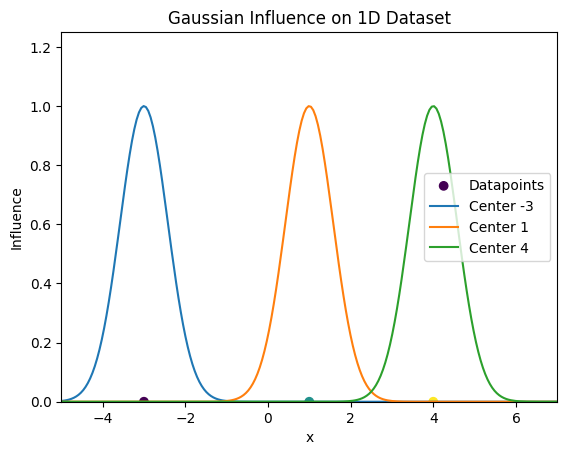

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rbf_gauss(gamma=1.0):
    return lambda x: np.exp(-gamma * np.linalg.norm(np.array(x))**2)

D = np.array([-3, 1, 4]).reshape(-1, 1)  # 3 datapoints
N = D.shape[0]
xlim = (-5, 7)

plt.figure()
plt.xlim(xlim)
plt.ylim(0, 1.25)
plt.title("Gaussian Influence on 1D Dataset")
plt.xlabel("x")
plt.ylabel("Influence")
plt.scatter(D, np.zeros(N), c=range(1, N + 1), marker='o', label="Datapoints")

x_coord = np.linspace(-7, 7, 250)
gamma = 1.5

for i in range(N):
    y_values = [rbf_gauss(gamma)(x - D[i]) for x in x_coord]
    plt.plot(x_coord, y_values, label=f"Center {D[i][0]}")

plt.legend()
plt.show()


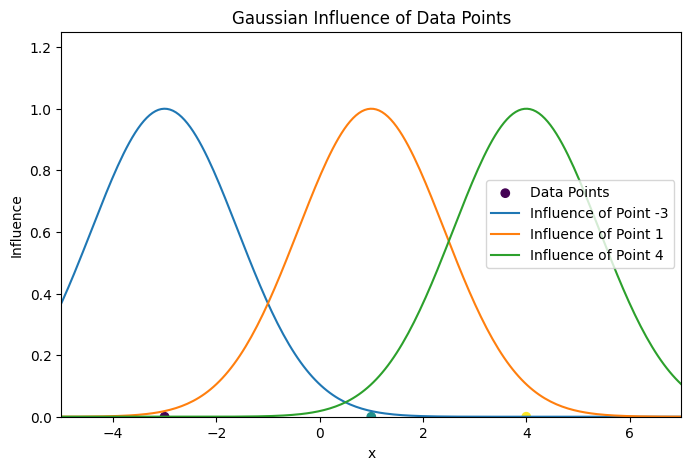

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rbf_gauss(gamma=1.0):
    return lambda x: np.exp(-gamma * np.linalg.norm(np.array(x))**2)

# Data points
D = np.array([-3, 1, 4]).reshape(-1, 1)
N = len(D)

# Plot settings
xlim = (-5, 7)
x_coord = np.linspace(-7, 7, 250)

gamma = 0.25  # Modified gamma value

plt.figure(figsize=(8, 5))
plt.xlim(xlim)
plt.ylim(0, 1.25)
plt.title("Gaussian Influence of Data Points")
plt.xlabel("x")
plt.ylabel("Influence")

# Plot the data points
plt.scatter(D, np.zeros(len(D)), c=range(1, N + 1), cmap='viridis', marker='o', label="Data Points")

# Plot Gaussian influences
for i in range(N):
    gauss_func = rbf_gauss(gamma)
    y_values = [gauss_func(x - D[i]) for x in x_coord]
    plt.plot(x_coord, y_values, label=f"Influence of Point {D[i][0]}")

plt.legend()
plt.show()


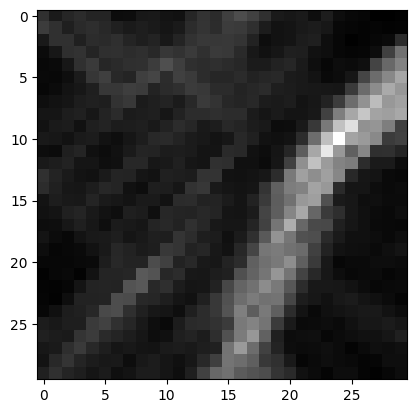

<ipython-input-7-ad0d53136522>:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 4))


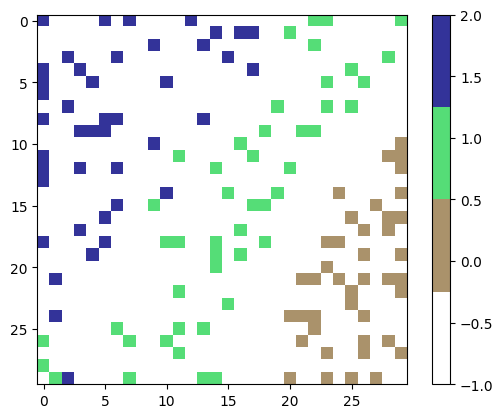

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def closest_node(data, t, som):
    return divmod(np.linalg.norm(som - data[t], axis=2).argmin(), som.shape[1])

def manhattan_dist(r1, c1, r2, c2):
    return abs(r1 - r2) + abs(c1 - c2)

def most_common(lst, n):
    return np.bincount(lst, minlength=n).argmax() if lst else -1

def main():
    np.random.seed(1)
    Rows, Cols, Dim = 30, 30, 4
    LearnMax, StepsMax = 0.5, 5000

    iris = load_iris()
    data_x, data_y = iris.data, iris.target

    som = np.random.rand(Rows, Cols, Dim)

    for s in range(StepsMax):
        t = np.random.randint(len(data_x))
        bmu_row, bmu_col = closest_node(data_x, t, som)
        curr_rate = (1 - s / StepsMax) * LearnMax

        for i in range(Rows):
            for j in range(Cols):
                if manhattan_dist(bmu_row, bmu_col, i, j) < (1 - s / StepsMax) * (Rows + Cols):
                    som[i, j] += curr_rate * (data_x[t] - som[i, j])

    u_matrix = np.zeros((Rows, Cols))
    for i in range(Rows):
        for j in range(Cols):
            neighbors = [som[x, y] for x, y in [(i-1,j), (i+1,j), (i,j-1), (i,j+1)] if 0 <= x < Rows and 0 <= y < Cols]
            u_matrix[i, j] = np.mean([np.linalg.norm(som[i, j] - n) for n in neighbors])

    plt.imshow(u_matrix, cmap='gray')
    plt.show()

    mapping = np.empty((Rows, Cols), dtype=object)
    for i in range(Rows):
        for j in range(Cols):
            mapping[i, j] = []

    for t in range(len(data_x)):
        m_row, m_col = closest_node(data_x, t, som)
        mapping[m_row, m_col].append(data_y[t])

    label_map = np.vectorize(lambda x: most_common(x, 3))(mapping)
    plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 4))
    plt.colorbar()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np

class ART:
    def __init__(self, input_size, max_clusters, vigilance):
        self.input_size = input_size
        self.max_clusters = max_clusters
        self.vigilance = vigilance
        self.weights = np.random.rand(max_clusters, input_size)
        self.num_clusters = 0

    def learn(self, input_pattern):
        for i in range(self.num_clusters):
            match_score = np.sum(np.minimum(self.weights[i], input_pattern)) / np.sum(input_pattern)
            if match_score >= self.vigilance:
                self.weights[i] = np.minimum(self.weights[i], input_pattern)
                return i

        if self.num_clusters < self.max_clusters:
            self.weights[self.num_clusters] = input_pattern
            self.num_clusters += 1
            return self.num_clusters - 1

        return -1  # No available cluster

# Example usage
data = np.array([
    [1, 0, 1, 0, 1],
    [1, 1, 1, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0]
])

art = ART(input_size=5, max_clusters=10, vigilance=0.5)

for i, pattern in enumerate(data):
    cluster = art.learn(pattern)
    print(f"Pattern {i} assigned to cluster {cluster}")


Pattern 0 assigned to cluster 0
Pattern 1 assigned to cluster 0
Pattern 2 assigned to cluster 1
Pattern 3 assigned to cluster 1


In [ ]:
import numpy as np

class ART:
    def __init__(self, input_size, max_clusters, vigilance):
        self.input_size = input_size
        self.max_clusters = max_clusters
        self.vigilance = vigilance
        self.weights = np.random.rand(max_clusters, input_size)
        self.num_clusters = 0

    def learn(self, input_pattern):
        for i in range(self.num_clusters):
            match_score = np.sum(np.minimum(self.weights[i], input_pattern)) / np.sum(input_pattern)
            if match_score >= self.vigilance:
                self.weights[i] = np.minimum(self.weights[i], input_pattern)
                return i

        if self.num_clusters < self.max_clusters:
            self.weights[self.num_clusters] = input_pattern
            self.num_clusters += 1
            return self.num_clusters - 1

        return -1  # No available cluster

# Example usage
data = np.array([
    [1, 0, 1, 0, 1],
    [1, 1, 1, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0]
])

art = ART(input_size=5, max_clusters=10, vigilance=0.5)

for i, pattern in enumerate(data):
    cluster = art.learn(pattern)
    print(f"Pattern {i} assigned to cluster {cluster}")

# Testing ART with a simple dataset
X = np.array([[0, 1], [0, 1], [1, 0], [1, 0]])
y = np.array([[0, 0, 1, 1]]).T

np.random.seed(1)
synapse_0 = 2 * np.random.random((2, 1)) - 1

for iter in range(10000):
    layer_0 = X
    layer_1 = 1 / (1 + np.exp(-np.dot(layer_0, synapse_0)))
    layer_1_error = layer_1 - y
    layer_1_delta = layer_1_error * (layer_1 * (1 - layer_1))
    synapse_0 -= np.dot(layer_0.T, layer_1_delta)

print("Output After Training:")
print(layer_1)


Pattern 0 assigned to cluster 0
Pattern 1 assigned to cluster 0
Pattern 2 assigned to cluster 1
Pattern 3 assigned to cluster 1
Output After Training:
[[0.00505119]
 [0.00505119]
 [0.99494905]
 [0.99494905]]


In [ ]:
import numpy as np

class ART1:
    def __init__(self, input_size, max_clusters, vigilance):
        self.input_size = input_size
        self.max_clusters = max_clusters
        self.vigilance = vigilance
        self.weights = np.ones((max_clusters, input_size))
        self.num_clusters = 0

    def learn(self, input_pattern):
        for i in range(self.num_clusters):
            match_score = np.sum(np.minimum(self.weights[i], input_pattern)) / np.sum(input_pattern)
            if match_score >= self.vigilance:
                self.weights[i] = np.minimum(self.weights[i], input_pattern)
                return i

        if self.num_clusters < self.max_clusters:
            self.weights[self.num_clusters] = input_pattern
            self.num_clusters += 1
            return self.num_clusters - 1

        return -1  # No available cluster

# Example usage
data = np.array([
    [1, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 1],
    [1, 0, 0, 0]
])

art = ART1(input_size=4, max_clusters=5, vigilance=0.5)

for i, pattern in enumerate(data):
    cluster = art.learn(pattern)
    print(f"Pattern {i} assigned to cluster {cluster}")

# Testing ART1 with a simple dataset
X = np.array([[0, 1], [0, 1], [1, 0], [1, 0]])
y = np.array([[0, 0, 1, 1]]).T

np.random.seed(1)
synapse_0 = 2 * np.random.random((2, 1)) - 1

for _ in range(10000):
    layer_0 = X
    layer_1 = 1 / (1 + np.exp(-np.dot(layer_0, synapse_0)))
    layer_1_error = layer_1 - y
    layer_1_delta = layer_1_error * (layer_1 * (1 - layer_1))
    synapse_0 -= np.dot(layer_0.T, layer_1_delta)

print("Output After Training:")
print(layer_1)


Pattern 0 assigned to cluster 0
Pattern 1 assigned to cluster 0
Pattern 2 assigned to cluster 1
Pattern 3 assigned to cluster 1
Pattern 4 assigned to cluster 0
Output After Training:
[[0.00505119]
 [0.00505119]
 [0.99494905]
 [0.99494905]]


In [ ]:
import math
import sys

# Constants
N = 4  # Number of components in an input vector.
M = 3  # Max number of clusters to be formed.
VIGILANCE = 0.4
PATTERNS = 7
TRAINING_PATTERNS = 4  # Use this many for training, the rest are for tests.
PATTERN_ARRAY = [
    [1, 1, 0, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 0, 1, 0]
]

class ART1:
    def __init__(self, input_size, num_clusters, vigilance, num_patterns, num_training, pattern_array):
        self.input_size = input_size
        self.num_clusters = num_clusters
        self.vigilance = vigilance
        self.num_patterns = num_patterns
        self.num_training = num_training
        self.patterns = pattern_array

        # Initialize weight matrices
        self.bw = [[1.0 / (1.0 + self.input_size)] * self.input_size for _ in range(self.num_clusters)]
        self.tw = [[1.0] * self.input_size for _ in range(self.num_clusters)]

        # Layers
        self.f1a = [0.0] * self.input_size
        self.f1b = [0.0] * self.input_size
        self.f2 = [0.0] * self.num_clusters

    def get_vector_sum(self, node_array):
        return sum(node_array)

    def get_maximum(self, node_array):
        return max(range(len(node_array)), key=lambda i: node_array[i])

    def test_for_reset(self, activation_sum, input_sum, f2_max):
        if (activation_sum / input_sum) >= self.vigilance:
            return False  # Candidate is accepted
        else:
            self.f2[f2_max] = -1.0  # Inhibit
            return True  # Candidate is rejected

    def update_weights(self, activation_sum, f2_max):
        for i in range(self.input_size):
            self.bw[f2_max][i] = (2.0 * self.f1b[i]) / (1.0 + activation_sum)
            self.tw[f2_max][i] = self.f1b[i]

    def run(self):
        print("Begin ART1:")
        for k in range(self.num_patterns):
            print(f"Vector: {k}\n")

            # Initialize f2 layer activations
            self.f2 = [0.0] * self.num_clusters

            # Input pattern to f1 layer
            self.f1a = self.patterns[k][:]

            # Compute input sum
            input_sum = self.get_vector_sum(self.f1a)
            print(f"InputSum (si) = {input_sum}\n")

            # Compute net input for each node in f2 layer
            for i in range(self.num_clusters):
                self.f2[i] = sum(self.bw[i][j] * self.f1a[j] for j in range(self.input_size))
            print(self.f2, "\n")

            reset = True
            while reset:
                f2_max = self.get_maximum(self.f2)

                # Perform AND function
                self.f1b = [self.f1a[i] * math.floor(self.tw[f2_max][i]) for i in range(self.input_size)]
                print(f"ActivationSum (x(i)) = {sum(self.f1b)}\n")

                reset = self.test_for_reset(sum(self.f1b), input_sum, f2_max)

                if k < self.num_training and not reset:
                    self.update_weights(sum(self.f1b), f2_max)
                    print(f"Vector #{k} belongs to cluster #{f2_max}\n")

    def print_results(self):
        print("Final weight values:")
        print("Bottom-up weights:")
        for row in self.bw:
            print(row)
        print("\nTop-down weights:")
        for row in self.tw:
            print(row)

if __name__ == '__main__':
    art1 = ART1(N, M, VIGILANCE, PATTERNS, TRAINING_PATTERNS, PATTERN_ARRAY)
    art1.run()
    art1.print_results()


Begin ART1:
Vector: 0

InputSum (si) = 2

[0.4, 0.4, 0.4] 

ActivationSum (x(i)) = 2

Vector #0 belongs to cluster #0

Vector: 1

InputSum (si) = 1

[0.0, 0.2, 0.2] 

ActivationSum (x(i)) = 1

Vector #1 belongs to cluster #1

Vector: 2

InputSum (si) = 1

[0.6666666666666666, 0.0, 0.2] 

ActivationSum (x(i)) = 1

Vector #2 belongs to cluster #0

Vector: 3

InputSum (si) = 2

[0.0, 1.0, 0.4] 

ActivationSum (x(i)) = 1

Vector #3 belongs to cluster #1

Vector: 4

InputSum (si) = 1

[0.0, 0.0, 0.2] 

ActivationSum (x(i)) = 1

Vector: 5

InputSum (si) = 1

[0.0, 0.0, 0.2] 

ActivationSum (x(i)) = 1

Vector: 6

InputSum (si) = 2

[1.0, 0.0, 0.4] 

ActivationSum (x(i)) = 1

Final weight values:
Bottom-up weights:
[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]
[0.2, 0.2, 0.2, 0.2]

Top-down weights:
[1, 0, 0, 0]
[0, 0, 0, 1]
[1.0, 1.0, 1.0, 1.0]


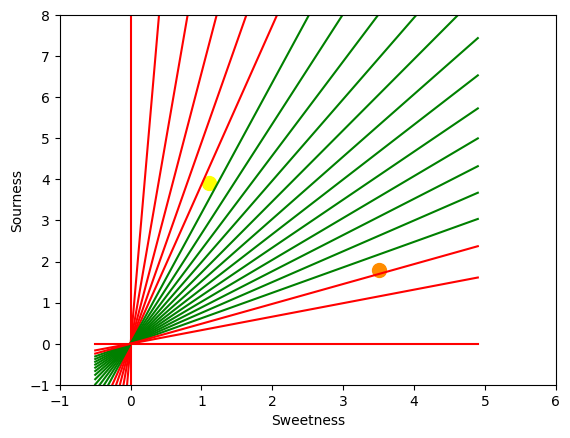

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_distance_function(a, b, c):
    """Creates a function that calculates the distance of a point from a line: 0 = ax + by + c"""

    def distance(x, y):
        """Returns a tuple (d, pos):
        - d: Distance from the point (x, y) to the line
        - pos: -1 if the point is below the line, 0 if on the line, +1 if above
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom < 0 and b < 0) or (nom > 0 and b > 0):
            pos = -1
        else:
            pos = 1
        return (np.abs(nom) / np.sqrt(a ** 2 + b ** 2), pos)

    return distance

# Define sample points
points = [(3.5, 1.8), (1.1, 3.9)]

# Create the plot
fig, ax = plt.subplots()
ax.set_xlabel("Sweetness")
ax.set_ylabel("Sourness")
ax.set_xlim([-1, 6])
ax.set_ylim([-1, 8])

# X values for line plotting
X = np.arange(-0.5, 5, 0.1)

# Plot the sample points
for index, (x, y) in enumerate(points):
    color = "darkorange" if index == 0 else "yellow"
    ax.plot(x, y, "o", color=color, markersize=10)

# Iterate through possible slopes
step = 0.05
for x in np.arange(0, 1 + step, step):
    slope = np.tan(np.arccos(x))
    dist_func = create_distance_function(slope, -1, 0)  # Line equation: slope*x - y = 0

    # Compute Y values for the current line
    Y = slope * X

    # Compute distances and positions for the sample points
    results = [dist_func(*point) for point in points]

    # Plot the line in green if it separates points, otherwise in red
    line_color = "g-" if results[0][1] != results[1][1] else "r-"
    ax.plot(X, Y, line_color)

# Show the plot
plt.show()


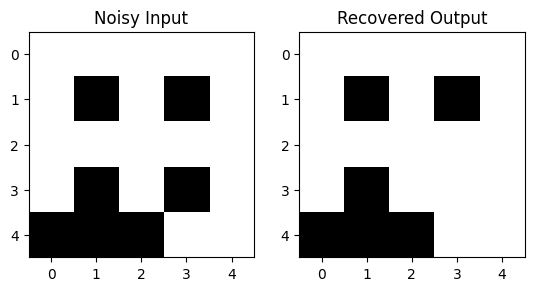

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert pattern string to 5x5 matrix
def string_to_matrix(pattern):
    pattern = pattern.replace("\n", "")
    return np.array([[-1 if c == 'X' else 1 for c in pattern[i:i+5]] for i in range(0, 25, 5)])

# Hopfield Network class
class HopfieldNetwork:
    def __init__(self, size):
        self.N = size
        self.W = np.zeros((size, size))

    def train(self, patterns):
        self.W = sum(np.outer(p, p) for p in patterns)
        np.fill_diagonal(self.W, 0)  # No self-connections

    def run(self, state, steps=10):
        for _ in range(steps):
            i = np.random.randint(self.N)
            state[i] = 1 if np.dot(self.W[i], state) >= 0 else -1
        return state

# Define test patterns
patterns = [
    """
    ..X..
    .X.X.
    X...X
    .X.X.
    ..X..
    """,
    """
    ..X..
    ..X..
    ..X..
    ..X..
    ..X..
    """
]

# Convert patterns to vectors
pattern_vectors = [string_to_matrix(p).flatten() for p in patterns]

# Initialize and train Hopfield network
HN = HopfieldNetwork(25)
HN.train(pattern_vectors)

# Introduce noise
test_state = pattern_vectors[0].copy()
test_state[np.random.choice(25, 5, replace=False)] *= -1  # Flip 5 bits

# Run Hopfield network
fig, axs = plt.subplots(1, 2)
axs[0].imshow(test_state.reshape(5, 5), cmap="binary_r")
axs[0].set_title("Noisy Input")

recovered_state = HN.run(test_state)
axs[1].imshow(recovered_state.reshape(5, 5), cmap="binary_r")
axs[1].set_title("Recovered Output")

plt.show()


In [ ]:
# Python program to illustrate
# Finding common member in list
# using 'in' operator
list1=[1,2,3,4,5]
list2=[6,7,8,9]
for item in list1:
  if item in list2:
    print("overlapping")
  else:
    print("not overlapping")

not overlapping
not overlapping
not overlapping
not overlapping
not overlapping


In [ ]:
# Python program to illustrate
# Finding common member in list
# without using 'in' operator
def overlapping(list1, list2):
    for i in list1:
        for j in list2:
            if i == j:
                return True
    return False

list1 = [1, 2, 3, 4, 5]
list2 = [6, 7, 8, 9]

print("overlapping" if overlapping(list1, list2) else "not overlapping")


not overlapping


In [ ]:
x = 24
y = 20
num_list = [10, 20, 30, 40, 50]

print("x is NOT present in the given list" if x not in num_list else "x is present in the given list")
print("y is present in the given list" if y in num_list else "y is NOT present in the given list")


x is NOT present in the given list
y is present in the given list


In [ ]:
# Python program to illustrate the use
# of 'is' identity operator
x = 5
if (type(x) is int):
  print ("true")
else:
  print ("false")

true


In [ ]:
# Python program to illustrate the
# use of 'is not' identity operator
x = 5.2
if (type(x) is not int):
   print ("true")
else:
   print ("false")

true


In [ ]:
pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.0 MB/s eta 0:00:00


In [ ]:
# Install rapidfuzz if not already installed: pip install rapidfuzz

from rapidfuzz import fuzz, process

s1 = "I love GeeksforGeeks"
s2 = "I am loving GeeksforGeeks"

print("Fuzzy Ratio:", fuzz.ratio(s1, s2))
print("Partial Ratio:", fuzz.partial_ratio(s1, s2))
print("Token Sort Ratio:", fuzz.token_sort_ratio(s1, s2))
print("Token Set Ratio:", fuzz.token_set_ratio(s1, s2))
print("WRatio:", fuzz.WRatio(s1, s2), '\n')

# Using process to find the best match
query = 'geeks for geeks'
choices = ['geek for geek', 'geek geek', 'g. for geeks']

print("List of ratios:", process.extract(query, choices))
print("Best match:", process.extractOne(query, choices))


Fuzzy Ratio: 84.44444444444444
Partial Ratio: 85.0
Token Sort Ratio: 84.44444444444444
Token Set Ratio: 85.71428571428571
WRatio: 84.44444444444444 

List of ratios: [('g. for geeks', 95.0, 2), ('geek for geek', 92.85714285714286, 0), ('geek geek', 85.5, 1)]
Best match: ('g. for geeks', 95.0, 2)


In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.0 MB/s eta 0:00:00


Suggested tip: 19.85%


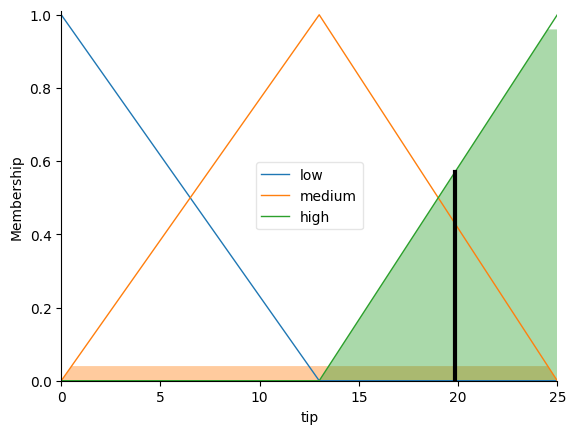

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#pip install scikit-fuzzy


# Define fuzzy variables (Antecedents: Quality & Service, Consequent: Tip)
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Define fuzzy membership functions (Auto-defined for quality and service)
quality.automf(3)  # Poor, Average, Good
service.automf(3)  # Poor, Average, Good

# Define custom membership functions for 'tip'
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

# Define fuzzy rules
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

# Create a control system and simulation
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Input values
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Compute the fuzzy logic output
tipping.compute()

# Print and visualize the results
print(f"Suggested tip: {tipping.output['tip']:.2f}%")
tip.view(sim=tipping)


In [ ]:
import random

# Number of individuals in each generation
POPULATION_SIZE = 100

# Valid genes
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = "I love GeeksforGeeks"

class Individual:
    """Class representing individual in population"""

    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(cls):
        """Create random genes for mutation"""
        return random.choice(GENES)

    @classmethod
    def create_gnome(cls):
        """Create chromosome or string of genes"""
        return [cls.mutated_genes() for _ in range(len(TARGET))]

    def mate(self, par2):
        """Perform mating and produce new offspring"""
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            prob = random.random()
            if prob < 0.45:
                child_chromosome.append(gp1)  # From parent 1
            elif prob < 0.90:
                child_chromosome.append(gp2)  # From parent 2
            else:
                child_chromosome.append(self.mutated_genes())  # Mutation

        return Individual(child_chromosome)

    def cal_fitness(self):
        """Calculate fitness score (lower is better)"""
        return sum(1 for gs, gt in zip(self.chromosome, TARGET) if gs != gt)

# Driver code
def main():
    global POPULATION_SIZE

    generation = 1
    found = False
    population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]

    while not found:
        # Sort population based on fitness
        population.sort(key=lambda x: x.fitness)

        # If the best individual has 0 fitness, we found the target
        if population[0].fitness == 0:
            found = True
            break

        new_generation = []
        # Carry forward 10% of the best individuals (Elitism)
        s = int((10 * POPULATION_SIZE) / 100)
        new_generation.extend(population[:s])

        # Generate new individuals by mating 90% of population
        s = int((90 * POPULATION_SIZE) / 100)
        for _ in range(s):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)

        population = new_generation

        # Print progress
        print(f"Generation: {generation}\tString: {''.join(population[0].chromosome)}\tFitness: {population[0].fitness}")
        generation += 1

    print(f"Final Generation: {generation}\tString: {''.join(population[0].chromosome)}\tFitness: {population[0].fitness}")

if __name__ == '__main__':
    main()


Generation: 1	String: t {E)Q IfO)]&}1j-RZO	Fitness: 18
Generation: 2	String: t {E)Q IfO)]&}1j-RZO	Fitness: 18
Generation: 3	String: KRlEhT;2zeO:@oxB3 cl	Fitness: 17
Generation: 4	String: KRlEhT;2zeO:@oxB3 cl	Fitness: 17
Generation: 5	String: I [T_P Iez:n]by2@RZ2	Fitness: 16
Generation: 6	String: 0Wl,B{ Gvzk
fHi,(e#?	Fitness: 14
Generation: 7	String: D diBp GvekNfOi,(e#Z	Fitness: 13
Generation: 8	String: D diBp GvekNfOi,(e#Z	Fitness: 13
Generation: 9	String: I ltU{ GRzkNfbtG@eH_	Fitness: 11
Generation: 10	String: I ltU{ GRzkNfbtG@eH_	Fitness: 11
Generation: 11	String: D lox{ GGekJfoiw.e#O	Fitness: 10
Generation: 12	String: I lKhH GePkNfotGpe%_	Fitness: 9
Generation: 13	String: I lKhH GePkNfotGpe%_	Fitness: 9
Generation: 14	String: I lKhH GePkNfotGpe%_	Fitness: 9
Generation: 15	String: s loo{ GeekhfogG.emg	Fitness: 8
Generation: 16	String: s loo{ GeekhfogG.emg	Fitness: 8
Generation: 17	String: I loMH Geek]foiG.eKO	Fitness: 7
Generation: 18	String: I loMH Geek]foiG.eKO	Fitness: 7
Generati

In [ ]:
import math
import random

class City:
    def __init__(self, x=None, y=None):
        if x is not None:
            self.x = x
        else:
            self.x = int(random.random() * 200)

        if y is not None:
            self.y = y
        else:
            self.y = int(random.random() * 200)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distanceTo(self, city):
        xDistance = abs(self.getX() - city.getX())
        yDistance = abs(self.getY() - city.getY())
        return math.sqrt((xDistance ** 2) + (yDistance ** 2))

    def __repr__(self):
        return f"({self.getX()}, {self.getY()})"

class TourManager:
    def __init__(self):
        self.destinationCities = []

    def addCity(self, city):
        self.destinationCities.append(city)

    def getCity(self, index):
        return self.destinationCities[index]

    def numberOfCities(self):
        return len(self.destinationCities)
class Tour:
    def __init__(self, tourmanager, tour=None):
        self.tourmanager = tourmanager
        self.tour = []
        self.fitness = 0.0
        self.distance = 0

        if tour is not None:
            self.tour = tour
        else:
            self.tour = [None] * self.tourmanager.numberOfCities()

    def generateIndividual(self):
        self.tour = self.tourmanager.destinationCities[:]
        random.shuffle(self.tour)

    def getCity(self, index):
        return self.tour[index]

    def setCity(self, index, city):
        self.tour[index] = city
        self.fitness = 0.0
        self.distance = 0

    def getFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.getDistance())
        return self.fitness

    def getDistance(self):
        if self.distance == 0:
            self.distance = sum(
                self.getCity(i).distanceTo(self.getCity((i + 1) % self.tourSize()))
                for i in range(self.tourSize())
            )
        return self.distance

    def tourSize(self):
        return len(self.tour)

    def containsCity(self, city):
        return city in self.tour

    def __repr__(self):
        return " -> ".join(str(city) for city in self.tour)

class Population:
    def __init__(self, tourmanager, populationSize, initialise):
        self.tours = [None] * populationSize
        if initialise:
            for i in range(populationSize):
                newTour = Tour(tourmanager)
                newTour.generateIndividual()
                self.saveTour(i, newTour)

    def saveTour(self, index, tour):
        self.tours[index] = tour

    def getTour(self, index):
        return self.tours[index]

    def getFittest(self):
        return max(self.tours, key=lambda tour: tour.getFitness())

    def populationSize(self):
        return len(self.tours)

class GA:
    def __init__(self, tourmanager):
        self.tourmanager = tourmanager
        self.mutationRate = 0.01
        self.tournamentSize = 5
        self.elitism = True

    def evolvePopulation(self, pop):
        newPopulation = Population(self.tourmanager, pop.populationSize(), False)
        elitismOffset = 1 if self.elitism else 0

        if self.elitism:
            newPopulation.saveTour(0, pop.getFittest())

        for i in range(elitismOffset, pop.populationSize()):
            parent1 = self.tournamentSelection(pop)
            parent2 = self.tournamentSelection(pop)
            child = self.crossover(parent1, parent2)
            newPopulation.saveTour(i, child)

        for i in range(elitismOffset, newPopulation.populationSize()):
            self.mutate(newPopulation.getTour(i))

        return newPopulation

    def crossover(self, parent1, parent2):
        child = Tour(self.tourmanager)
        start, end = sorted([random.randint(0, parent1.tourSize() - 1) for _ in range(2)])

        child.tour[start:end] = parent1.tour[start:end]

        for city in parent2.tour:
            if city not in child.tour:
                for i in range(child.tourSize()):
                    if child.tour[i] is None:
                        child.setCity(i, city)
                        break

        return child

    def mutate(self, tour):
        for tourPos1 in range(tour.tourSize()):
            if random.random() < self.mutationRate:
                tourPos2 = random.randint(0, tour.tourSize() - 1)
                tour.tour[tourPos1], tour.tour[tourPos2] = tour.tour[tourPos2], tour.tour[tourPos1]

    def tournamentSelection(self, pop):
        tournament = Population(self.tourmanager, self.tournamentSize, False)
        for i in range(self.tournamentSize):
            randomIdx = random.randint(0, pop.populationSize() - 1)
            tournament.saveTour(i, pop.getTour(randomIdx))
        return tournament.getFittest()

if __name__ == '__main__':
    tourmanager = TourManager()

    cities = [City(random.randint(0, 200), random.randint(0, 200)) for _ in range(20)]
    for city in cities:
        tourmanager.addCity(city)

    pop = Population(tourmanager, 50, True)
    print("Initial distance: " + str(pop.getFittest().getDistance()))

    ga = GA(tourmanager)
    for i in range(500):
        pop = ga.evolvePopulation(pop)

    print("Finished")
    print("Final distance: " + str(pop.getFittest().getDistance()))
    print("Solution:")
    print(pop.getFittest())


Initial distance: 1753.9137616808791
Finished
Final distance: 982.6365628799808
Solution:
(69, 152) -> (93, 122) -> (126, 140) -> (175, 149) -> (135, 169) -> (99, 195) -> (102, 185) -> (102, 172) -> (95, 165) -> (50, 192) -> (38, 137) -> (26, 122) -> (9, 122) -> (15, 92) -> (1, 14) -> (2, 0) -> (72, 16) -> (177, 16) -> (189, 65) -> (34, 77)
